## Standardization (z-score Scaling)

Standardization is just transforming your columns/features so that they have a mean = 0 and standard deviation = 1.

Formula :     

                                       Xi' = (Xi - mean) / standard deviation


### After transfromation your features:
- Mean = 0 
- Standard deviation = 1
- Distribution shape does not changes

### Key Ponits
- Standardization is usually applied to those algorithms that assume features are normally/bell shaped distributed.\
  For Example: Linear regression, Logistic regression, SVM, PCA.
- It is recommended that 
  1. Use feature scaling after train split test
  2. Fit on traning data
  3. Transform on both training and testing data.
- Less sensitive to outliers.
- Can be applied to data having negative numbers.

In [238]:
# import liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [239]:
# Load the dataset
df = pd.read_csv("Social_Network_Ads.csv")

In [240]:
# Lets see how our data looks like
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
31,15729054,Female,27,137000,1
375,15646091,Female,46,32000,1
126,15610801,Male,42,65000,0
125,15697020,Female,39,61000,0
156,15791174,Male,46,59000,0


In [241]:
# Filtering the data that is of our use for now
df = df.iloc[:, 2:]
df.sample(5)

,Age,EstimatedSalary,Purchased
296,42,73000,1
325,41,60000,0
32,21,16000,0
218,46,96000,0
207,52,114000,0


In [242]:
# train_test_split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis = 1), df["Purchased"], test_size = 0.5, random_state = 0)

## Standard Scalar

In [243]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(X_train)

X_train_transformed = ss.transform(X_train)
X_test_transformed = ss.transform(X_test)

In [244]:
# Converting into pandas dataframe and checking how our data look like after standardization
X_train_transformed = pd.DataFrame(X_train_transformed, columns = X_train.columns)
X_test_transformed = pd.DataFrame(X_test_transformed, columns = X_test.columns)
X_test_transformed.sample(5)
# X_test_transformed.sample(5)

,Age,EstimatedSalary
83,-1.146874,-0.928020
191,-0.173297,1.520348
71,-0.270655,0.310913
5,-1.049516,-1.370496
101,-0.562728,1.579345


In [245]:
np.round(X_train.describe(), 2)

,Age,EstimatedSalary
count,200.00,200.00
mean,37.78,66460.00
std,10.30,33985.19
min,18.00,15000.00
25%,30.00,38750.00
50%,37.00,62500.00
75%,46.00,82250.00
max,60.00,150000.00


We can clearly see that the **mean of original features Age and EstimatedSalary are 37.78 and 66460 and std deviation of is 10.30 and 33985.19 are respectively**. 

In [246]:
np.round(X_train_transformed.describe(), 2)

,Age,EstimatedSalary
count,200.00,200.00
mean,-0.00,-0.00
std,1.00,1.00
min,-1.93,-1.52
25%,-0.76,-0.82
50%,-0.08,-0.12
75%,0.80,0.47
max,2.16,2.46


After standardization the **mean and std deviation are 0 and 1 for both features**.

## Effect of Standarzization on Shape

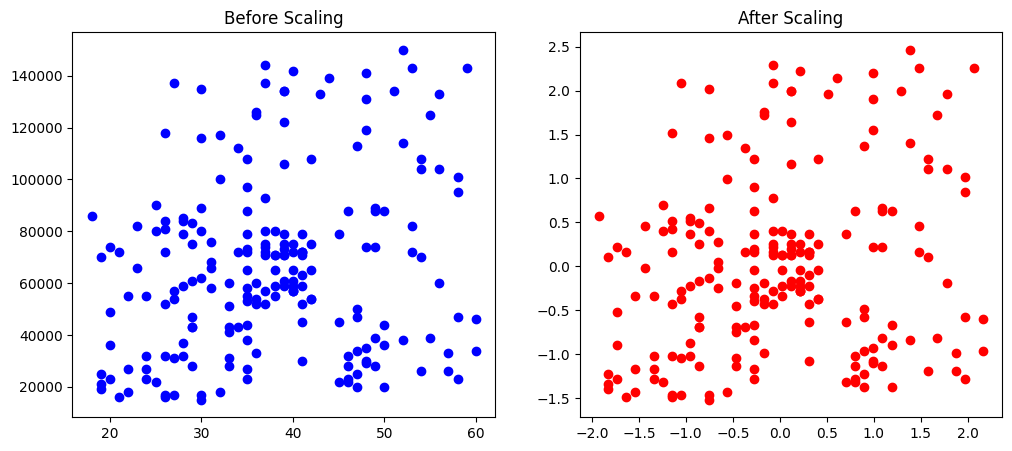

In [247]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'], color = 'blue')
ax1.set_title("Before Scaling")

ax2.scatter(X_train_transformed['Age'], X_train_transformed['EstimatedSalary'], color = 'red')
ax2.set_title("After Scaling")

plt.show()


No effect of scaling on the shape. Data looks the same.

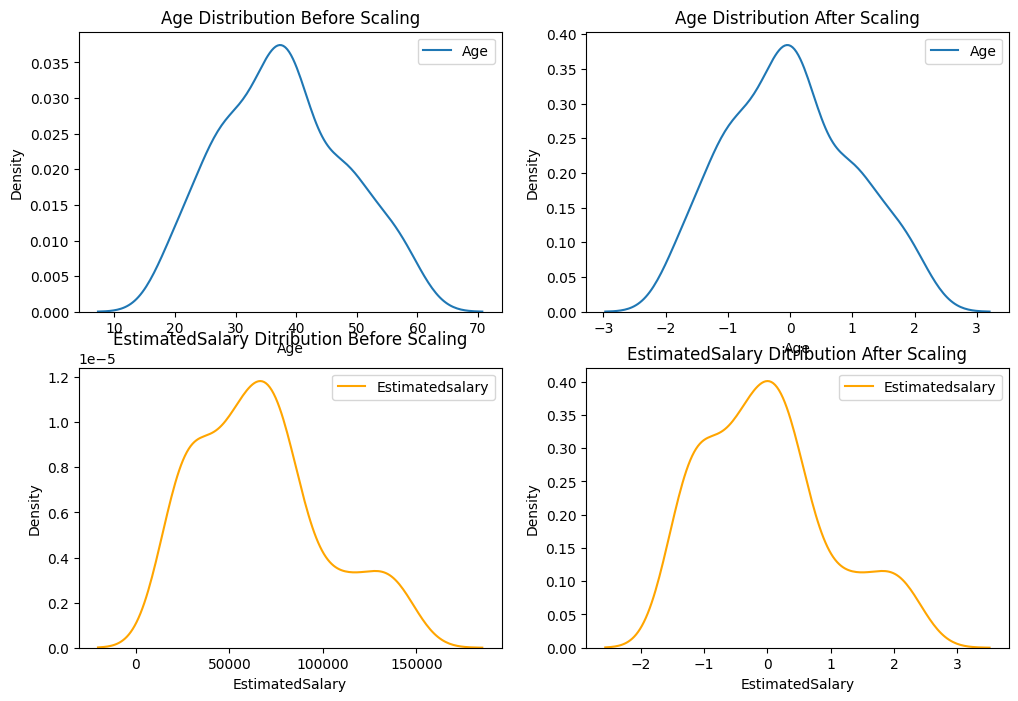

In [248]:
# Effect of scaling on the distribution of the features
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

# Before scaling Age feature
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1, label = "Age")
ax1.legend()

# After scaling Age feature
ax2.set_title('Age Distribution After Scaling')
sns.kdeplot(X_train_transformed['Age'], ax=ax2, label = "Age")
ax2.legend()

# Before scaling EstimatedSalary feature
ax3.set_title("EstimatedSalary Ditribution Before Scaling")
sns.kdeplot(X_train["EstimatedSalary"], ax = ax3, color = 'orange', label = "Estimatedsalary")
ax3.legend()

# After scaling EstimatedSalary feature
ax4.set_title("EstimatedSalary Ditribution After Scaling")
sns.kdeplot(X_train_transformed["EstimatedSalary"], ax = ax4, color = 'orange', label = "Estimatedsalary")
ax4.legend()

plt.show()

No affect of standardization on the shape of features.

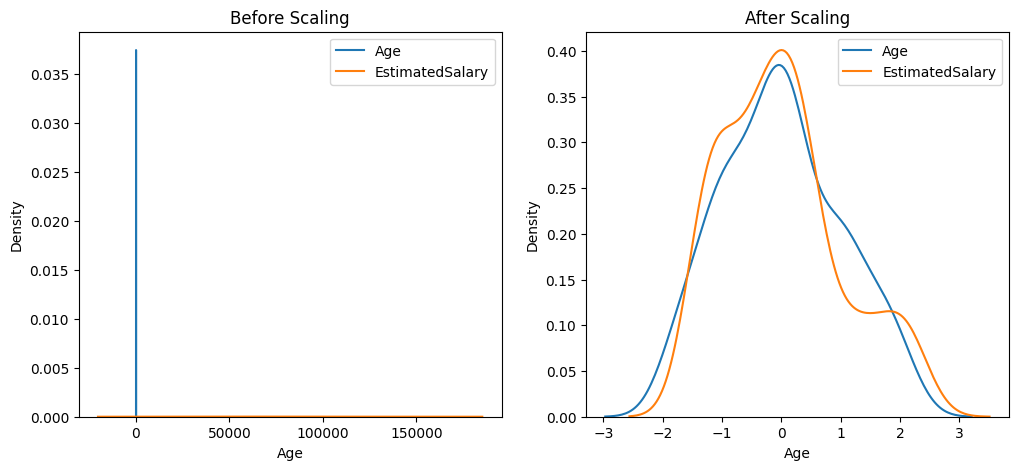

In [249]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'], ax = ax1, label = "Age")
sns.kdeplot(X_train['EstimatedSalary'], ax = ax1, label = 'EstimatedSalary')
ax1.legend()

# After scaling
ax2.set_title("After Scaling")
sns.kdeplot(X_train_transformed['Age'], ax = ax2, label = "Age")
sns.kdeplot(X_train_transformed['EstimatedSalary'], ax = ax2, label = 'EstimatedSalary')
ax2.legend()

plt.show()

### Effect on Outliers

In [255]:
df.sample(5)

,Age,EstimatedSalary,Purchased
315,39,75000,1
383,49,28000,1
287,48,138000,1
290,39,134000,1
131,33,31000,0


In [256]:
# Lets add some outliers in the data
df = pd.concat([df, pd.DataFrame({
    'Age': [6, 78, 86, 10], 
    'EstimatedSalary': [1000, 325000, 500000, 6000], 
    'Purchased': [0, 1, 1, 0]})],
    ignore_index = True)

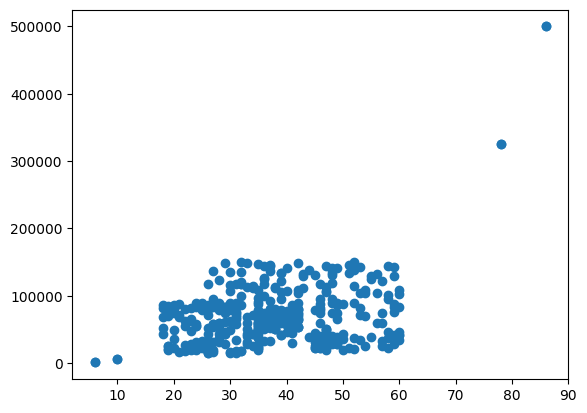

In [257]:
# Lets have a scatter plot
plt.scatter(df['Age'], df['EstimatedSalary'])
plt.show()

In [258]:
# train_test_split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis = 1), df["Purchased"], test_size = 0.5, random_state = 0)

# Standard Scaling
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(X_train)

X_train_transformed = ss.transform(X_train)
X_test_transformed = ss.transform(X_test)

# Converting into pandas dataframe and checking how our data look like after standardization
X_train_transformed = pd.DataFrame(X_train_transformed, columns = X_train.columns)
X_test_transformed = pd.DataFrame(X_test_transformed, columns = X_test.columns)
X_test_transformed.sample(5)
# X_test_transformed.sample(5)


,Age,EstimatedSalary
118,-0.876759,-0.305415
89,-0.792669,0.044611
152,-0.456310,-0.060397
97,0.468677,1.164695
78,0.552766,-0.882958


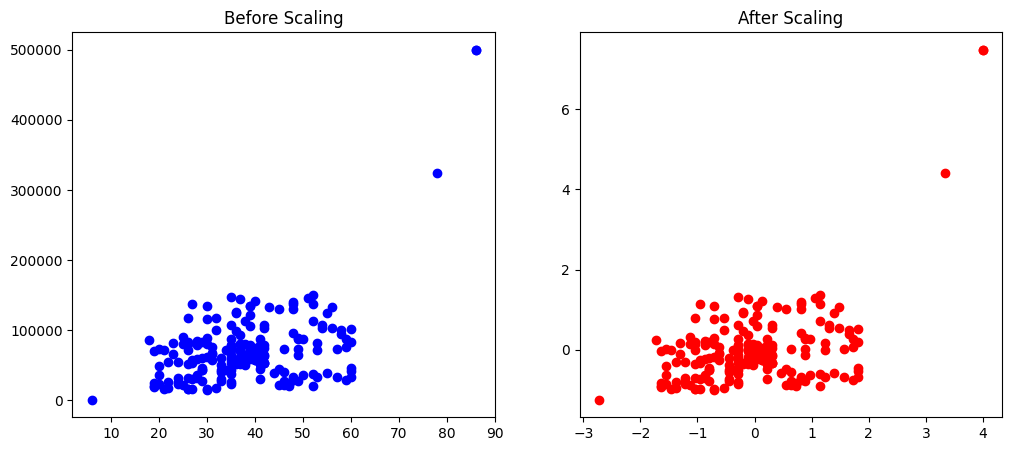

In [259]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'], color = 'blue')
ax1.set_title("Before Scaling")

ax2.scatter(X_train_transformed['Age'], X_train_transformed['EstimatedSalary'], color = 'red')
ax2.set_title("After Scaling")

plt.show()

Not much effect on outliers due to standardization.